In [205]:
import numpy as np
import matplotlib.pyplot as plt

In [268]:
def generate_mesh(L, N, V=0):
    nodes = np.zeros((N*N,2))
    tris = np.array([])
    h = L/(N-1)
    coord = np.linspace(0, L, N)
    #Choose variant and generate nodal coordinates
    if V==0:
        for i in range(N):
            nodes[N*i:N*(i+1), 0] = coord
            nodes[N*i:N*(i+1), 1] = coord[i]
    elif V==1:
        for i in range(N):        
            nodes[N*i:N*(i+1), 0] = np.linspace(0, L-i*h/2, N)
            nodes[N*i:N*(i+1), 1] = coord[i]
    elif V==2:
        for i in range(N):        
            nodes[N*i:N*(i+1), 1] = coord[i]
            nodes[N*i:N*(i+1), 0] = coord*(coord*coord[i]/(2*L**2)-coord[i]/(2*L)+1)
    elif V==3:
        angle = np.linspace(0, np.pi/4, N)
        radius = np.linspace(2*L, L, N)
        for i in range(N):        
            nodes[N*i:N*(i+1), 0] = 2*L-radius*np.cos(angle[i])
            nodes[N*i:N*(i+1), 1] = radius*np.sin(angle[i])
    
    #Generate odered triangular elements
    for j in range(N*(N-1)):
        if j%N == 0:
            t = np.array([j, j+1, j+N])
            tris = np.append(tris, t)
        elif j%(N) == N-1:
            t = np.array([j, j+N, j+N-1])
            tris = np.append(tris, t)
        else:
            t = np.array([j, j+N, j+N-1])
            tris = np.append(tris, t)
            t = np.array([j, j+1, j+N])
            tris = np.append(tris, t)
    tris = tris.reshape(int(tris.shape[0]/3), 3)
    tris = tris.astype(int)
    return nodes, tris

coords, elems = generate_mesh(0.02, 10)

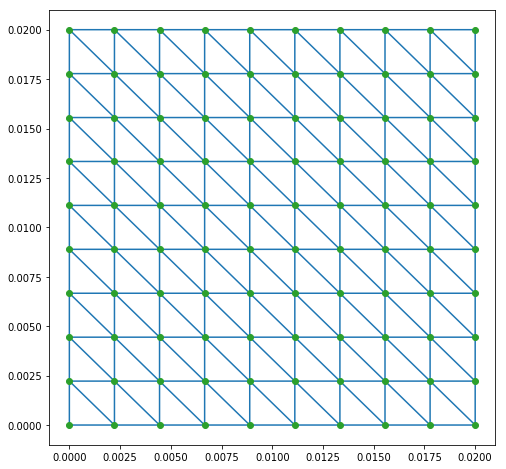

In [269]:
plt.figure(figsize = (8,8))
plt.triplot(coords[:,0], coords[:,1], elems)
plt.plot(coords[:,0], coords[:,1], 'o')
plt.show()


In [274]:
def assemble_global(nodes, elems, k, hz):
    N = nodes.shape[0]
    H = np.zeros((N,N))
    ref = np.array([[2,-1,-1],[-1,1,0],[-1,0,1]])
    for i in range(elems.shape[0]):
        a = nodes[elems[i, 0]]
        b = nodes[elems[i, 1]]
        c = nodes[elems[i, 2]]
        H_loc = k*hz/2*((b[0]-a[0])*(c[1]-a[1])-(c[0]-a[0])*(b[1]-a[1]))*ref
        for k in range(3):
            for j in range(3):
                H[elems[i, k],elems[i, j]] = H_loc[k,j]
    return H
H1 = assemble_global(coords, elems, 314, 0.001)
print(H1)

[[ 1.55061728e-06 -7.75308642e-07  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.75308642e-07  9.87654321e-09 -4.93827160e-09 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.93827160e-09  9.87654321e-09 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.93827160e-09
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   4.93827160e-09  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  4.93827160e-09]]
